In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

## Load the Data

In [2]:
Player_Price = pd.read_csv("/Users/munirahalzuman/Downloads/final_data.csv")



In [5]:
Player_Price.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
Player_Price.shape

(10754, 22)

In [4]:
Player_Price.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [14]:
# uniqeness
Player_Price.duplicated().sum()

0

In [15]:
# Completeness
Player_Price.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [16]:
# Accurecy types
Player_Price.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [17]:
# Accurecy - Outlier

In [ ]:
#investigate all the elemenys within each feature

for column in Player_Price:
    unique_vals = np.unique(Player_Price[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 16:
        print(f'The number of values for feature {column} :{nr_values}--{unique_vals}')
    else:
        print(f'The number of values for feature {column} :{nr_values}')

The number of values for feature player :10754
The number of values for feature team :374
The number of values for feature name :10584
The number of values for feature position :16--['Attack' 'Attack Centre-Forward' 'Attack-LeftWinger' 'Attack-RightWinger'
 'Attack-SecondStriker' 'Defender' 'Defender Centre-Back'
 'Defender Left-Back' 'Defender Right-Back' 'Goalkeeper' 'midfield'
 'midfield-AttackingMidfield' 'midfield-CentralMidfield'
 'midfield-DefensiveMidfield' 'midfield-LeftMidfield'
 'midfield-RightMidfield']
The number of values for feature height :47
The number of values for feature age :30
The number of values for feature appearance :108
The number of values for feature goals :5329
The number of values for feature assists :5065
The number of values for feature yellow cards :6291
The number of values for feature second yellow cards :1095
The number of values for feature red cards :1219
The number of values for feature goals conceded :742
The number of values for feature clean s

In [3]:
#Position column contains a mix of generic and specific roles, 
#we need to preprocess the data to handle this effectively and avoid redundancy or noise in the model.

position_mapping = {
    'Attack': 'Attack',
    'Attack Centre-Forward': 'Attack',
    'Attack-LeftWinger': 'Attack',
    'Attack-RightWinger': 'Attack',
    'Attack-SecondStriker': 'Attack',
    'Defender': 'Defender',
    'Defender Centre-Back': 'Defender',
    'Defender Left-Back': 'Defender',
    'Defender Right-Back': 'Defender',
    'Goalkeeper': 'Goalkeeper',
    'midfield': 'Midfield',
    'midfield-AttackingMidfield': 'Midfield',
    'midfield-CentralMidfield': 'Midfield',
    'midfield-DefensiveMidfield': 'Midfield',
    'midfield-LeftMidfield': 'Midfield',
    'midfield-RightMidfield': 'Midfield'
}

# Apply the mapping
Player_Price['Position_Group'] = Player_Price['position'].map(position_mapping)

In [4]:
# Get unique combinations of 'Position_Group' and 'position_encoded'
unique_positions = Player_Price[['Position_Group', 'position_encoded']].drop_duplicates()

# Display the result
unique_positions

,Position_Group,position_encoded
0,Goalkeeper,1
3,Defender,2
14,Midfield,3
23,Attack,4


In [5]:
# Check if all the values in the 'height' column of the Player_Price DataFrame are integers.
print(Player_Price['height'].apply(float.is_integer).all())
# Check if all the values in the 'age' column of the Player_Price DataFrame are integers.
print(Player_Price['age'].apply(float.is_integer).all())

False
False


In [6]:
# Check if all values in the columns are integers (though stored as floats)
columns_to_check = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets']
for col in columns_to_check:
    print(f"Column '{col}' contains only integers: {Player_Price[col].apply(float.is_integer).all()}")

Column 'goals' contains only integers: False
Column 'assists' contains only integers: False
Column 'yellow cards' contains only integers: False
Column 'second yellow cards' contains only integers: False
Column 'red cards' contains only integers: False
Column 'goals conceded' contains only integers: False
Column 'clean sheets' contains only integers: False


In [7]:
# For each column in the list 'columns_to_check', round the values to 0 decimal places, 
# then convert the values to integers (int64 type) and update the column in the Player_Price DataFrame.
for col in columns_to_check:
    Player_Price[col] = Player_Price[col].round(0).astype('int64')

In [130]:
Player_Price.dtypes

player               object
team                 object
name                 object
position             object
height              float64
                     ...   
current_value         int64
highest_value         int64
position_encoded      int64
winger                int64
Position_Group       object
Length: 23, dtype: object

<Figure size 1500x800 with 0 Axes>

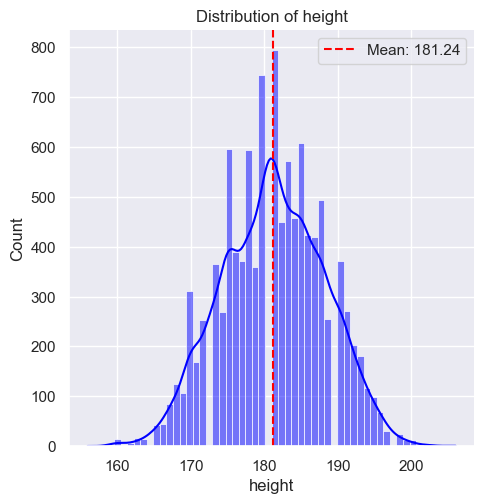

In [34]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['height'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of height')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['height'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

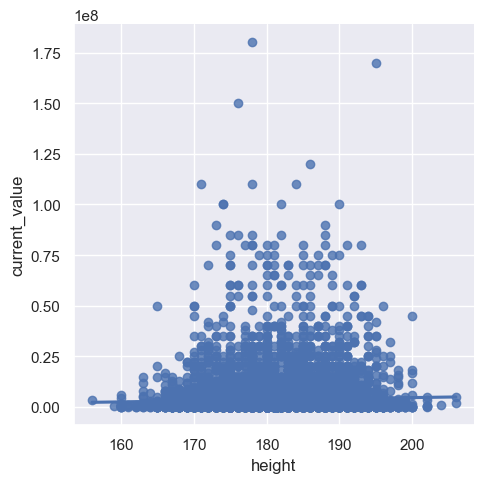

In [37]:
sns.lmplot(x='height',y='current_value', data=Player_Price, fit_reg=True, ci=None)

<Figure size 1500x800 with 0 Axes>

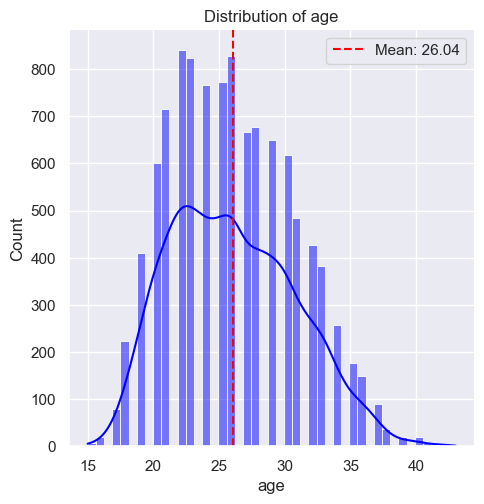

In [47]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['age'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of age')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['age'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

In [52]:
Player_Price[Player_Price['age'] == 15]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group
6724,/stiven-jimenez/profil/spieler/1008431,FC Cincinnati,Stiven Jimenez,midfield-DefensiveMidfield,168.000000,15.0,9,0,0,1,...,0,660,0,0,0,0,0,3,0,Midfield
6989,/nimfasha-berchimas/profil/spieler/1000273,Charlotte FC,Nimfasha Berchimas,Attack-LeftWinger,181.240353,15.0,1,0,0,0,...,0,65,0,0,0,25000,25000,4,1,Attack
7267,/luis-rivera/profil/spieler/999379,Real Salt Lake City,Luis Rivera,Defender Centre-Back,181.240353,15.0,7,0,0,0,...,0,472,0,0,0,50000,50000,2,0,Defender
7290,/axel-kei/profil/spieler/921859,Real Salt Lake City,Axel Kei,Attack Centre-Forward,185.000000,15.0,1,0,0,0,...,0,44,103,18,0,0,0,4,0,Attack
7427,/maximo-carrizo/profil/spieler/989968,New York City FC,Máximo Carrizo,midfield-AttackingMidfield,160.000000,15.0,4,0,0,0,...,0,295,0,0,0,0,0,3,0,Midfield
8662,/taiga-kameda/profil/spieler/1126311,Vissel Kobe,Taiga Kameda,Goalkeeper,183.000000,15.0,5,0,0,0,...,0,450,0,0,0,0,0,1,0,Goalkeeper


<Figure size 1500x800 with 0 Axes>

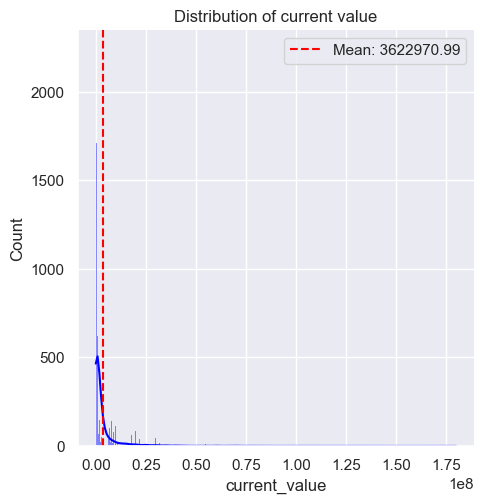

In [53]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['current_value'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of current value')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['current_value'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

In [8]:
# Identify rows where 'current_value' is greater than 100,000,000 or equal to 0
condition = (Player_Price['current_value'] > 100000000) | (Player_Price['current_value'] == 0)

# Drop these rows from the DataFrame
Player_Price = Player_Price[~condition]

<Figure size 1500x800 with 0 Axes>

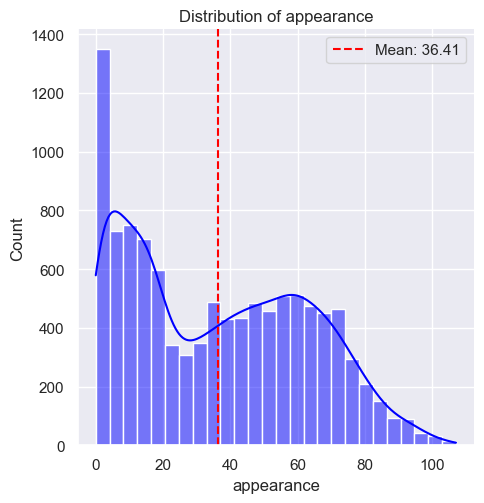

In [70]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['appearance'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of appearance')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['appearance'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

In [136]:
Player_Price[Player_Price['appearance'] == 0]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group
189,/andy-lonergan/profil/spieler/14044,Everton FC,Andy Lonergan,Goalkeeper,193.000000,39.0,0,0,0,0,...,0,0,255,32,3,200000,700000,1,0,Goalkeeper
322,/darren-randolph/profil/spieler/51321,AFC Bournemouth,Darren Randolph,Goalkeeper,187.000000,36.0,0,0,0,0,...,0,0,103,18,1,500000,4500000,1,0,Goalkeeper
349,/matthew-cox/profil/spieler/741236,Brentford FC,Matthew Cox,Goalkeeper,183.000000,20.0,0,0,0,0,...,0,0,0,0,0,500000,500000,1,0,Goalkeeper
565,/niklas-klinger/profil/spieler/192268,VfL Wolfsburg,Niklas Klinger,Goalkeeper,187.000000,27.0,0,0,0,0,...,0,0,132,24,3,100000,100000,1,0,Goalkeeper
620,/jakob-busk/profil/spieler/203411,1.FC Union Berlin,Jakob Busk,Goalkeeper,189.000000,29.0,0,0,0,0,...,0,0,134,22,2,250000,800000,1,0,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,/james-nieuwenhuizen/profil/spieler/1064381,Melbourne City FC,James Nieuwenhuizen,Goalkeeper,181.240353,19.0,0,0,0,0,...,0,0,0,0,0,25000,25000,1,0,Goalkeeper
10660,/emile-peios/profil/spieler/1118353,Melbourne City FC,Emile Peios,midfield,181.240353,19.0,0,0,0,0,...,0,0,0,0,0,25000,25000,3,0,Midfield
10663,/emin-durakovic/profil/spieler/1066862,Melbourne City FC,Emin Durakovic,midfield-LeftMidfield,181.240353,17.0,0,0,0,0,...,0,0,0,0,0,25000,25000,3,1,Midfield
10673,/arion-sulemani/profil/spieler/1066861,Melbourne City FC,Arion Sulemani,Attack Centre-Forward,181.240353,18.0,0,0,0,0,...,0,0,101,12,0,25000,25000,4,0,Attack


In [9]:
# Identify indices of rows where 'appearance' is equal to 0
condition2 = Player_Price[Player_Price['appearance'] == 0].index

# Drop rows by index
Player_Price = Player_Price.drop(condition2)

In [138]:
Player_Price['appearance'].value_counts()

appearance
1      294
17     220
4      220
10     214
5      207
      ... 
98       3
106      2
104      2
107      2
103      1
Name: count, Length: 107, dtype: int64

<Figure size 1500x800 with 0 Axes>

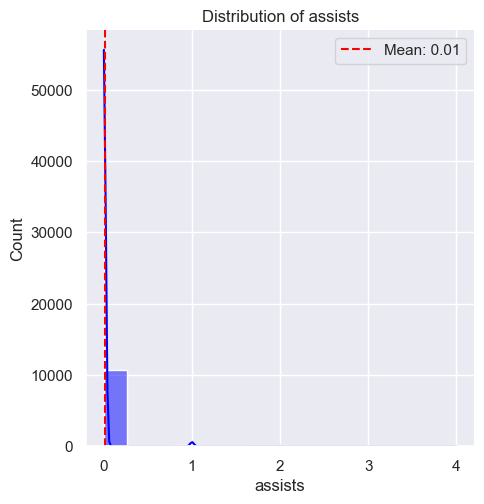

In [76]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['assists'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of assists')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['assists'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

<Figure size 1500x800 with 0 Axes>

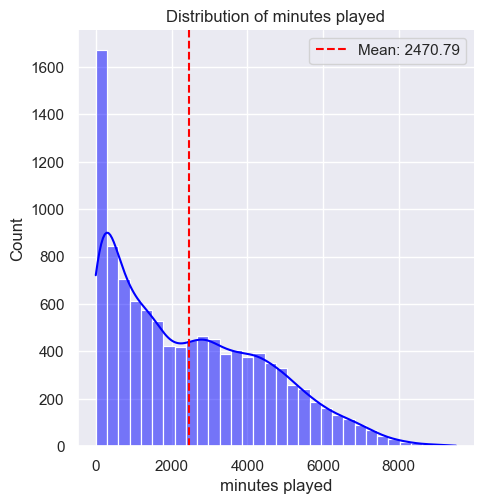

In [78]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['minutes played'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of minutes played')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['minutes played'].mean()

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

In [ ]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['goals'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of goals')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['goals'].mean()

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

In [84]:
Player_Price[(Player_Price['appearance'] == 0) |(Player_Price['minutes played'] == 0)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group
189,/andy-lonergan/profil/spieler/14044,Everton FC,Andy Lonergan,Goalkeeper,193.000000,39.0,0,0,0,0,...,0,0,255,32,3,200000,700000,1,0,Goalkeeper
322,/darren-randolph/profil/spieler/51321,AFC Bournemouth,Darren Randolph,Goalkeeper,187.000000,36.0,0,0,0,0,...,0,0,103,18,1,500000,4500000,1,0,Goalkeeper
349,/matthew-cox/profil/spieler/741236,Brentford FC,Matthew Cox,Goalkeeper,183.000000,20.0,0,0,0,0,...,0,0,0,0,0,500000,500000,1,0,Goalkeeper
565,/niklas-klinger/profil/spieler/192268,VfL Wolfsburg,Niklas Klinger,Goalkeeper,187.000000,27.0,0,0,0,0,...,0,0,132,24,3,100000,100000,1,0,Goalkeeper
620,/jakob-busk/profil/spieler/203411,1.FC Union Berlin,Jakob Busk,Goalkeeper,189.000000,29.0,0,0,0,0,...,0,0,134,22,2,250000,800000,1,0,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,/emile-peios/profil/spieler/1118353,Melbourne City FC,Emile Peios,midfield,181.240353,19.0,0,0,0,0,...,0,0,0,0,0,25000,25000,3,0,Midfield
10663,/emin-durakovic/profil/spieler/1066862,Melbourne City FC,Emin Durakovic,midfield-LeftMidfield,181.240353,17.0,0,0,0,0,...,0,0,0,0,0,25000,25000,3,1,Midfield
10673,/arion-sulemani/profil/spieler/1066861,Melbourne City FC,Arion Sulemani,Attack Centre-Forward,181.240353,18.0,0,0,0,0,...,0,0,101,12,0,25000,25000,4,0,Attack
10699,/ethan-cox/profil/spieler/745416,Adelaide United,Ethan Cox,Goalkeeper,181.240353,19.0,0,0,0,0,...,0,0,0,0,0,50000,50000,1,0,Goalkeeper


In [10]:
# Identify indices of rows where 'appearance' is equal to 0
condition3 = Player_Price[Player_Price['minutes played'] == 0].index

# Drop rows by index
Player_Price = Player_Price.drop(condition3)


In [11]:
Player_Price[Player_Price['minutes played'] == 0]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group


<Figure size 1500x800 with 0 Axes>

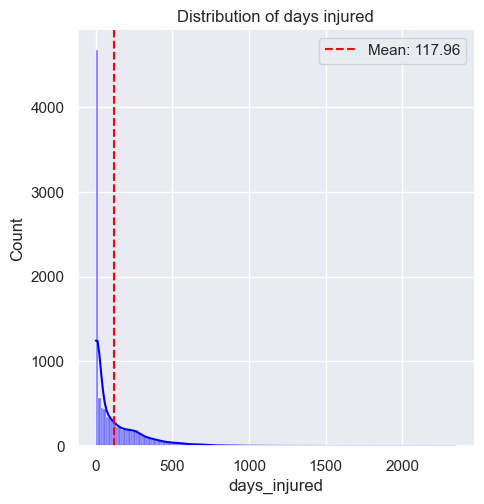

In [90]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['days_injured'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of days injured')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['days_injured'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

<Figure size 1500x800 with 0 Axes>

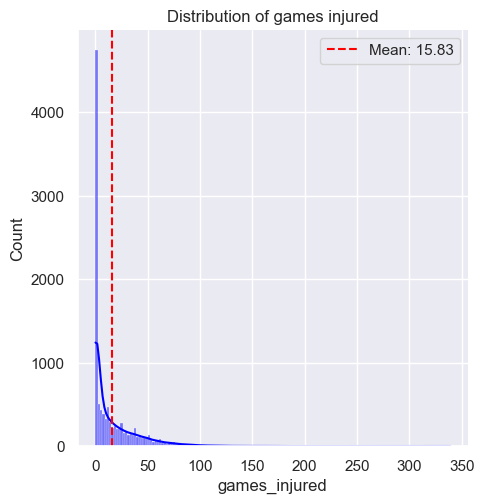

In [92]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['games_injured'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of games injured')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['games_injured'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

<Figure size 1500x800 with 0 Axes>

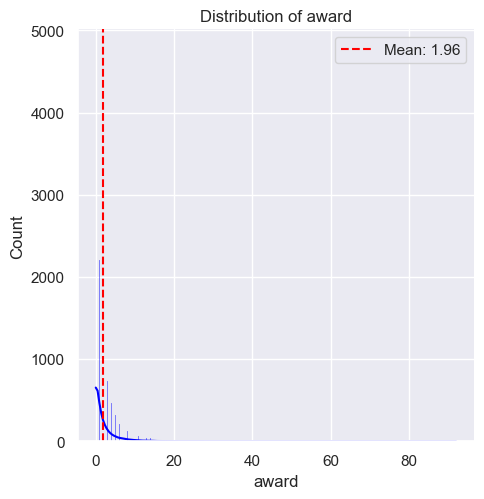

In [93]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['award'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of award')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['award'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

<Figure size 1500x800 with 0 Axes>

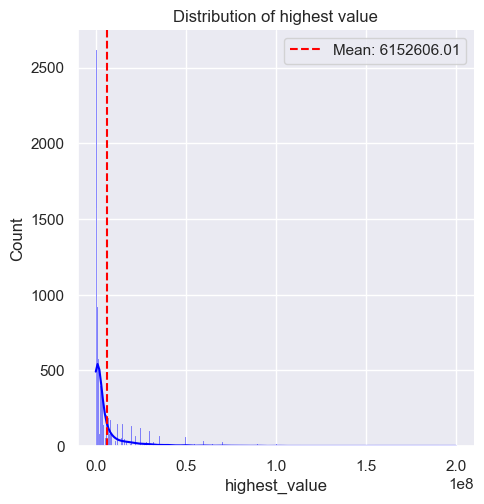

In [94]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['highest_value'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of highest value')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['highest_value'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

<Figure size 1500x800 with 0 Axes>

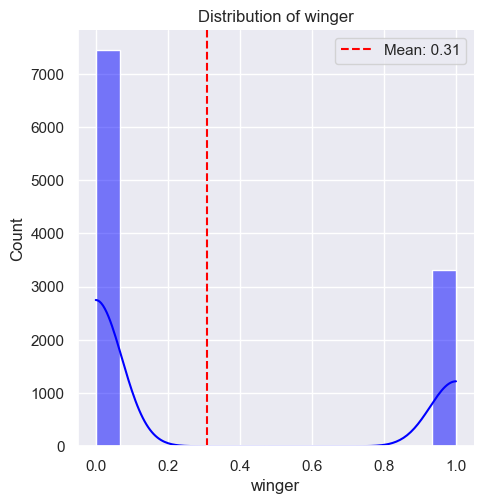

In [95]:
plt.figure(figsize=(15,8))


# Creating a distribution plot for each numeric column
sns.displot(Player_Price['winger'], kde=True, color='blue')  # Add kde=True for the density curve
plt.title(f'Distribution of winger')  # Add a title for better readability
    
# Calculating and plotting the mean
mean = Player_Price['winger'].mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
plt.legend()  # Show legend for mean line
plt.show()  # Display the plot

In [14]:
from scipy.stats import zscore  # Import zscore from scipy.stats

# Calculate the z-scores for the 'winger' column and get the unique values
z_scores = zscore(Player_Price['winger'])
unique_z_scores = pd.Series(z_scores).unique()
unique_z_scores

array([-0.67862089,  1.4735768 ])

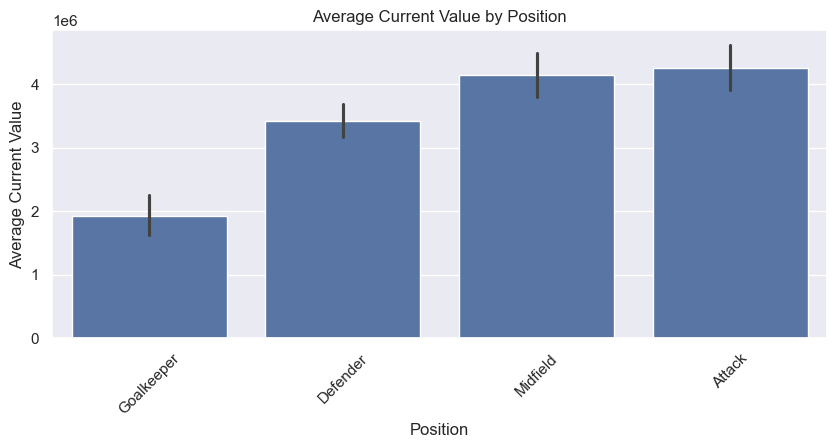

In [168]:
plt.figure(figsize=(10,4))
# Barplot to show the mean current_value for each position
sns.barplot(data=Player_Price, x='Position_Group', y='current_value') 
plt.title('Average Current Value by Position')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Position')
plt.ylabel('Average Current Value')
plt.show()

In [147]:
Player_Price['team'].value_counts()

team
Jeonbuk Hyundai Motors    45
Daejeon Hana Citizen      44
Gangwon FC                42
Daegu FC                  42
Royal AM FC               39
                          ..
CA Osasuna                22
Manchester City           21
Newcastle United Jets     21
Club Atlético Tucumán     21
Hatayspor                 12
Name: count, Length: 373, dtype: int64

In [12]:
# Calculate the 35th and 75th percentiles of the price
p35 = Player_Price['current_value'].quantile(0.35)
p75 = Player_Price['current_value'].quantile(0.75)



In [13]:
# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Low'
    elif price < p75:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
Player_Price['current_value_category'] = Player_Price['current_value'].apply(categorize_price)

Player_Price.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(Player_Price['current_value_category'].value_counts())

current_value_category
Medium    4073
Low       3462
High      2677
Name: count, dtype: int64


In [29]:
p35, p75

(500000.0, 3000000.0)

In [14]:
encoder = LabelEncoder()
Player_Price['current_value_category'] = encoder.fit_transform(Player_Price['current_value_category'])  

#### 3. Feature selection

In [15]:
Player_Price_new = Player_Price.drop(['player', 'team', 'name', 'position', 'position_encoded'], axis =1)

In [16]:
Player_Price_new = pd.get_dummies(Player_Price_new, columns =['Position_Group'])

In [49]:
Player_Price_new.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'winger', 'current_value_category',
       'Position_Group_Attack', 'Position_Group_Defender',
       'Position_Group_Goalkeeper', 'Position_Group_Midfield'],
      dtype='object')

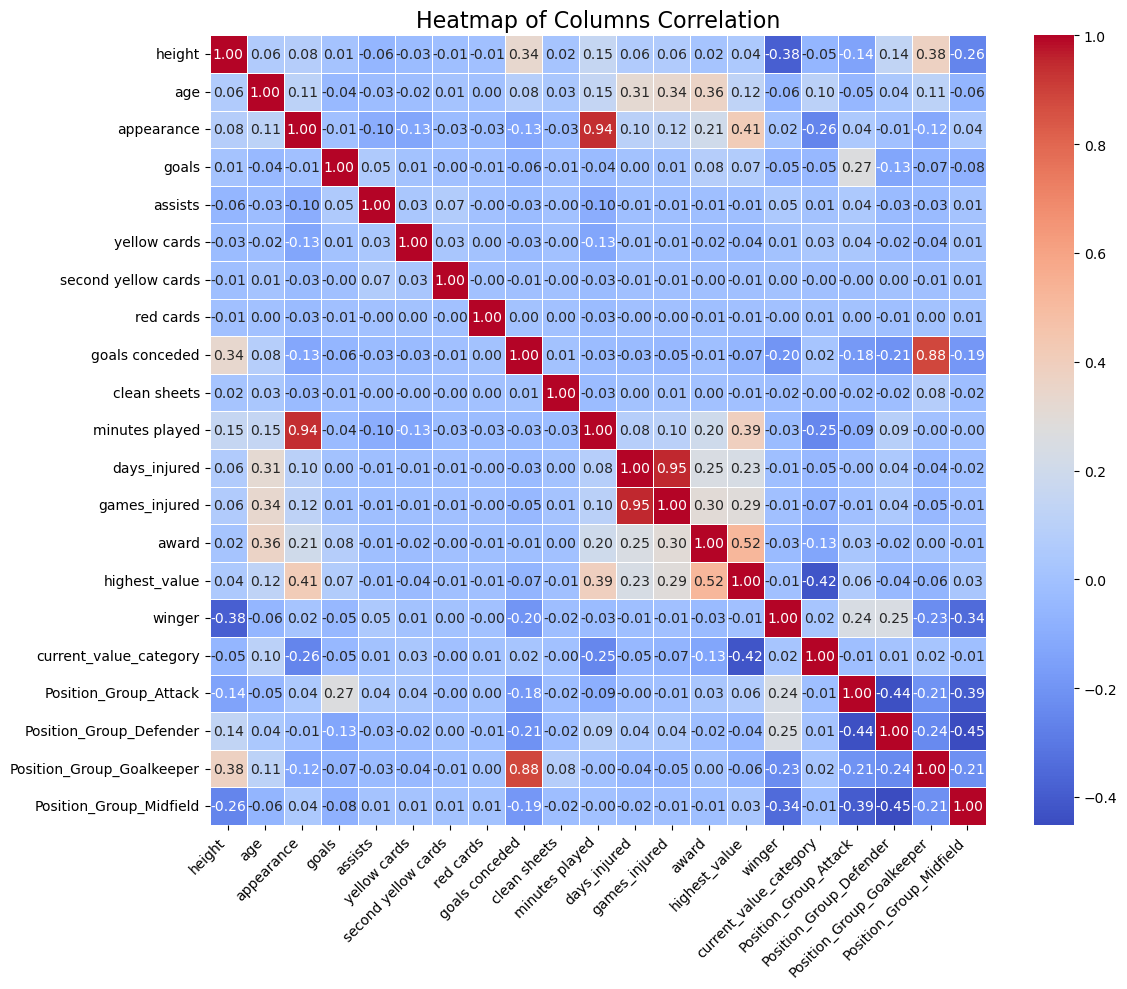

In [17]:
# Calculate the correlation matrix
correlation_matrix = Player_Price_new.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Heatmap of Columns Correlation", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
correlation = Player_Price_new.corr()
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category       1.000000
age                          0.104325
yellow cards                 0.032772
winger                       0.023094
goals conceded               0.021596
Position_Group_Goalkeeper    0.019961
Position_Group_Defender      0.009389
assists                      0.007634
red cards                    0.007627
clean sheets                -0.002662
second yellow cards         -0.003775
Position_Group_Attack       -0.010831
Position_Group_Midfield     -0.012326
days_injured                -0.047257
goals                       -0.048222
height                      -0.054712
games_injured               -0.066544
award                       -0.132973
minutes played              -0.247995
appearance                  -0.256071
highest_value               -0.419987
Name: current_value_category, dtype: float64


In [20]:
# Set the correlation threshold
threshold = 0.1  

# Filter the correlations
selected_features = correlation[abs(correlation['current_value_category']) > threshold]['current_value_category'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'award', 'highest_value',
       'current_value_category'],
      dtype='object')

In [21]:
selected_features = ['age', 'appearance', 'minutes played', 'award', 'highest_value',
       'current_value_category']

In [22]:
new_Player_raw = Player_Price_new[selected_features]
new_Player_raw.head()

,age,appearance,minutes played,award,highest_value,current_value_category
0,32.0,104,9390,13,70000000,0
1,30.0,15,1304,1,22000000,2
2,37.0,4,292,4,6000000,2
3,25.0,82,6408,9,50000000,0
4,30.0,63,5031,21,80000000,0


# Prepare train and test data

In [23]:
# Prepare data
x = new_Player_raw.drop(['current_value_category'], axis = 1)
x_coulmns = new_Player_raw.drop(['current_value_category'], axis = 1)
y = new_Player_raw['current_value_category']




In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
x.shape

(10212, 5)

## Buliding the Model

In [27]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [28]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],   # adjust tree depth
    'n_estimators':[35, 40, 50, 60]      # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [29]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [32]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 60}

In [33]:
best_model = grid_search.best_estimator_

## Test the Model

In [34]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model 

In [35]:
# our benchmark model
base_model = round(new_Player_raw['current_value_category'].value_counts()[1]/new_Player_raw.shape[0]*100, 2)
base_model

33.9

1. Accuracy

In [36]:
# Evaluate train set dt model
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9998775859958379

In [37]:
# Evaluate test set dt model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.8159569260890847

In [38]:
# Evaluate train set dt model
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9997551719916759

In [39]:
# Evaluate test set rf model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8649045521292217

In [40]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8882360142000245

In [41]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8658835046500245

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[503,   0,  36],
       [  1, 560, 135],
       [ 85,  17, 706]])

In [43]:
print("Train classification report for best rf:")
print(f' {classification_report(y_train, y_pred_train_rf_g, labels=list(best_model.classes_))}')
print(" Test classification report for best rf: ")
print(f'{classification_report(y_test, y_pred_rf_g, labels=list(best_model.classes_))}')

Train classification report for best rf:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2138
           1       0.98      0.83      0.90      2766
           2       0.83      0.90      0.87      3265

    accuracy                           0.89      8169
   macro avg       0.90      0.89      0.89      8169
weighted avg       0.89      0.89      0.89      8169

 Test classification report for best rf: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       539
           1       0.97      0.80      0.88       696
           2       0.81      0.87      0.84       808

    accuracy                           0.87      2043
   macro avg       0.88      0.87      0.87      2043
weighted avg       0.87      0.87      0.87      2043



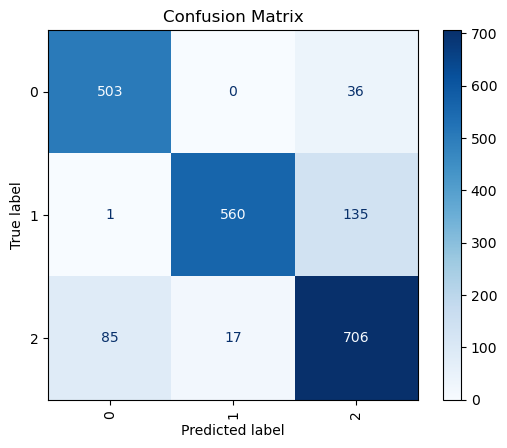

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.88


In [46]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.87


In [47]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.87


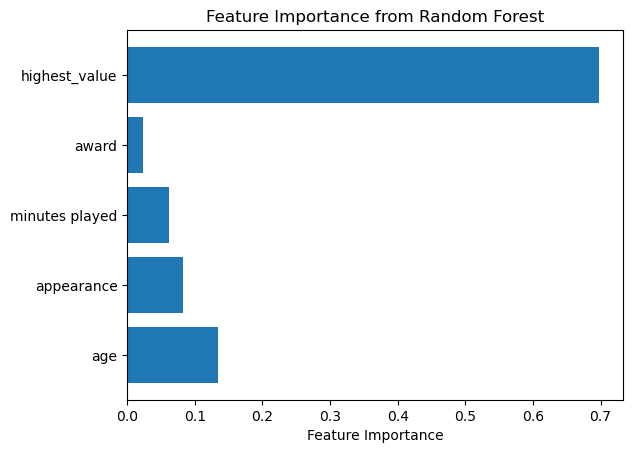

In [49]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(x.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()